In [260]:

#  Principal Component Analysis (PCA):

# Similarities with SVM and LDA-
# PCA is an unsupervised dimensionality reduction technique, while SVM and LDA are supervised learning algorithms 
# for classification (or regression in the case of Support Vector Regressor).

# All three methods can be used for feature extraction or dimensionality reduction in machine learning tasks.

# They are used to reduce the dimensionality of the feature space while retaining as much information as possible.


# Differences from SVM and LDA-
# PCA does not consider class labels during dimensionality reduction; it focuses solely on maximizing the variance of the data.

# PCA projects the data onto orthogonal axes (principal components) that capture the maximum variance, while SVM and LDA 
# seek to find decision boundaries that best separate the classes.

# PCA is primarily used for unsupervised tasks such as data visualization, noise reduction, or speeding up other algorithms 
# by reducing the dimensionality of the input space, whereas SVM and LDA are used for supervised classification tasks.



#  Support Vector Machines (SVM) or Support Vector Regressor (SVR):

# Similarities with PCA and LDA-
# SVM and SVR can be combined with PCA or LDA for dimensionality reduction and feature extraction.

# Both SVM and LDA aim to find optimal decision boundaries that separate classes or predict continuous values (SVR).

# They are used in various machine learning tasks, including classification and regression.

# Differences from PCA and LDA-
# SVM and SVR are supervised learning algorithms, while PCA is an unsupervised technique.

# SVM and SVR directly model the decision boundary or regression function, while PCA focuses on capturing the maximum 
# variance in the data.

# SVM and SVR are particularly effective when dealing with high-dimensional data or data with complex decision boundaries, 
# whereas PCA is more commonly used for dimensionality reduction or feature extraction in simpler, unsupervised tasks.

        
    
#  Linear Discriminant Analysis (LDA):
# Similarities with PCA and SVM-
# LDA, like PCA and SVM, can be used for dimensionality reduction and feature extraction.

# All three methods are employed in classification tasks, with LDA specifically tailored for supervised classification.

# Differences from PCA and SVM-
# LDA explicitly models the distribution of features in each class to find the optimal linear discriminant axes, while PCA 
# aims to maximize variance across the entire dataset without considering class labels.

# LDA is specifically designed for classification tasks and aims to find linear combinations of features that best separate 
# classes, whereas SVM can handle both classification and regression tasks, and PCA is primarily used for unsupervised 
# dimensionality reduction.

# LDA assumes that the data are normally distributed within each class and that the classes have the same covariance matrix, 
# which may not always hold true in practice. SVM and PCA make fewer assumptions about the underlying data distribution.
        

In [242]:

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm


# Load dataset
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df.head()

# select ONLY numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)

print(df.dtypes)


mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [243]:

print(df.head())


                    mpg  cyl   disp   hp  drat   wt  qsec  vs  am  gear  carb
rownames                                                                     
Mazda RX4         21.00    6 160.00  110  3.90 2.62 16.46   0   1     4     4
Mazda RX4 Wag     21.00    6 160.00  110  3.90 2.88 17.02   0   1     4     4
Datsun 710        22.80    4 108.00   93  3.85 2.32 18.61   1   1     4     1
Hornet 4 Drive    21.40    6 258.00  110  3.08 3.21 19.44   1   0     3     1
Hornet Sportabout 18.70    8 360.00  175  3.15 3.44 17.02   0   0     3     2


Text(0.5, 1.0, 'Correlation Heatmap')

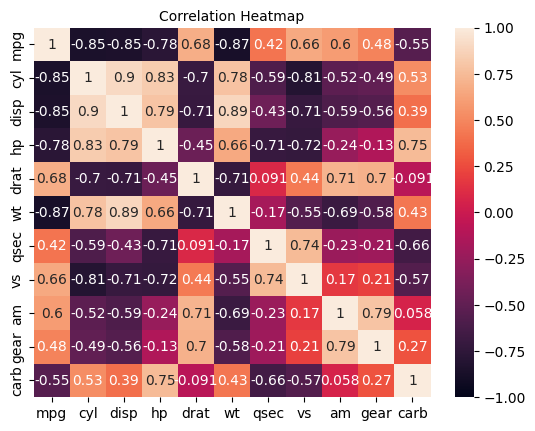

In [244]:

# Increase the size of the heatmap.plt.figure(figsize=(16, 6))# Store heatmap object in a variable to easily access it 
# when you want to include more features (such as title).

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the 
# correlation values on the heatmap.

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=5)


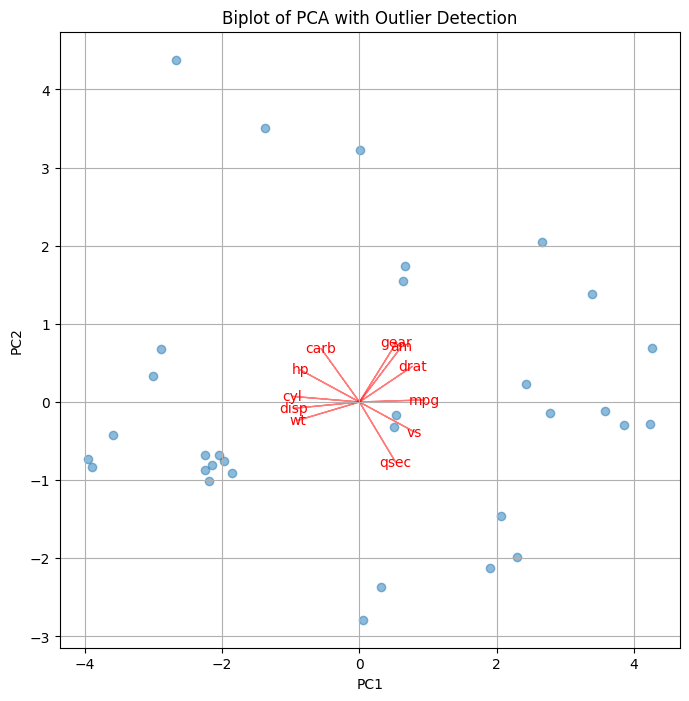

In [245]:

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Initialize PCA with outlier detection
pca_model = PCA(n_components=2)  # You can choose the number of components
X_pca = pca_model.fit_transform(X_scaled)

# Get the Hotelling's T2 statistic
t2_statistic = pca_model.score_samples(X_scaled)

# Plot biplot
biplot(pca_model, X_scaled, title='Biplot of PCA with Outlier Detection')

# Define the threshold for identifying outliers
threshold = np.percentile(t2_statistic, 95)  # Example: 95th percentile

# Identify outliers based on the threshold
outliers_indices = np.where(t2_statistic > threshold)[0]
df_no_outliers = df.drop(df.index[outliers_indices])  # Drop rows based on indices

# Refit PCA without outliers
X_no_outliers = scaler.transform(df_no_outliers)
X_pca_no_outliers = pca_model.transform(X_no_outliers)


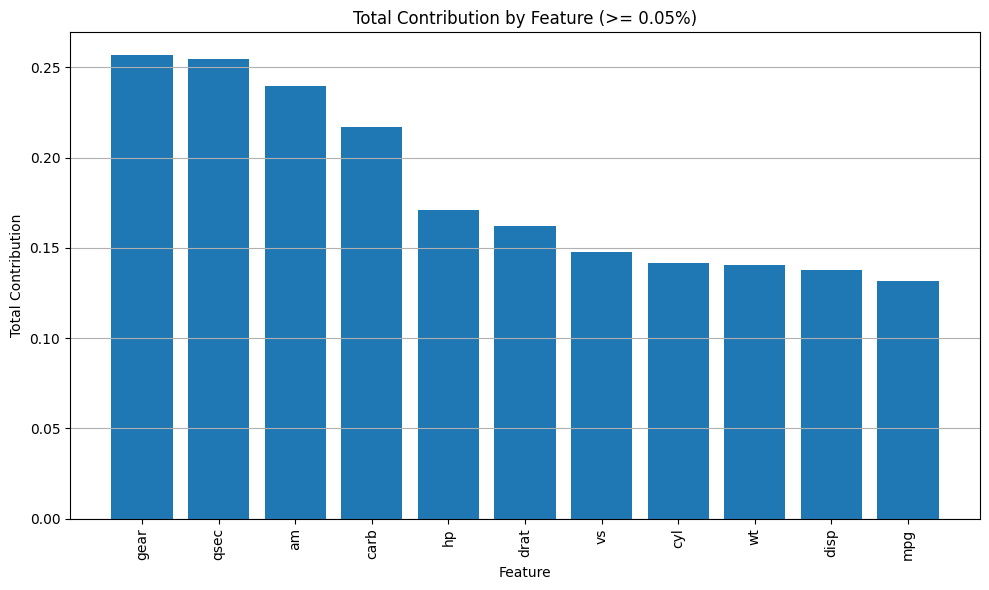

In [246]:

import numpy as np
import matplotlib.pyplot as plt

# Get loadings (components) from PCA model
loadings = pca_model.components_

# Calculate total contribution of each feature across all components
total_contribution = np.sum(loadings**2, axis=0)

# Get feature names with total contribution >= 0.05%
significant_features = feature_names[total_contribution >= 0.05]
significant_total_contribution = total_contribution[total_contribution >= 0.05]

# Sort significant features and total contributions by total contribution in descending order
sorted_indices = np.argsort(significant_total_contribution)[::-1]
significant_features = significant_features[sorted_indices]
significant_total_contribution = significant_total_contribution[sorted_indices]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(significant_features, significant_total_contribution, align='center')
plt.xlabel('Feature')
plt.ylabel('Total Contribution')
plt.title('Total Contribution by Feature (>= 0.05%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


In [247]:

# In PCA (Principal Component Analysis), the loadings (or components) represent the directions in feature space along which 
# the data varies the most. The loadings are orthogonal unit vectors (meaning they have a length of 1) that point in the 
# direction of maximum variance in the data.

# When you're examining the loadings of a particular feature, such as 'hp' (horsepower), 'disp' (displacement), or 
# 'mpg' (miles per gallon), a loading of 1.0 means that these features are perfectly aligned with one of the principal 
# components. This implies that these features contribute significantly to the variance captured by that principal component.

# For example, if 'hp' has a loading of 1.0 on the first principal component (PC1), it means that the variation in 
# horsepower across your dataset is very well aligned with the direction of maximum variance captured by PC1. Similarly, 
# a loading of close to 1.0 for 'mpg' indicates that variations in miles per gallon are also highly aligned with PC1.

# By applying PCA first and then using SVM, you can benefit from both the dimensionality reduction capabilities of PCA 
# and the classification power of SVM, leading to improved performance and efficiency in handling high-dimensional datasets.

# whether to use PCA before SVM depends on the specific characteristics of your dataset and the goals of your analysis. 
# In some cases, you may find that PCA helps improve the performance of SVM, while in other cases, using the original 
# feature space without PCA preprocessing may be more appropriate.


In [248]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['mpg'])  # Features
y = df['mpg']  # Target variable

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Train an SVM regressor
svm_regressor = SVR(kernel='linear')  # You can also try other kernels like 'rbf'
svm_regressor.fit(X_train_pca, y_train)

# Step 5: Evaluate the performance
y_pred = svm_regressor.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 8.528831777827245
R-squared: 0.7866943185994758


In [249]:

# Prepare a new data point
new_data_point = [[6, 160.0, 110, 3.90, 2.620, 16.46, 0, 1, 4, 4]]  # Example values for the features

# Step 1: Standardize the new data point
new_data_point_scaled = scaler.transform(new_data_point)

# Step 2: Transform standardized data point using PCA
new_data_point_pca = pca.transform(new_data_point_scaled)

# Step 3: Use the trained SVM regressor to predict MPG
predicted_mpg = svm_regressor.predict(new_data_point_pca)

print("Predicted MPG:", predicted_mpg)


# We know the 'Mazda RX4' has a MPG = 21.0, so we're definitely close with the prediction here!


Predicted MPG: [21.14847289]


In [265]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2

# Load dataset
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df = df.fillna(0)

# Convert continuous variables to categorical codes
bins = [0, 20, 30, 40]  # Define bins for categorization
labels = ['low', 'medium', 'high']  # Define labels for each category
df['mpg_category'] = pd.cut(df['mpg'], bins=bins, labels=labels)

# Standardize the features
# Preprocess the dataset and divide into train and test
X = df.drop(columns=['mpg_category'])  # Features
y = df['mpg_category']  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [266]:

from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the parameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solver options
    'shrinkage': [None, 'auto'],         # Shrinkage options
    'n_components': [None, 2, 5, 10]     # Number of components options
}

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Initialize GridSearchCV
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_lda = grid_search.best_estimator_

# Evaluate the best model on the test set
best_accuracy = best_lda.score(X_test, y_test)
print("Accuracy of Best Model:", best_accuracy)


Best Hyperparameters: {'n_components': None, 'shrinkage': None, 'solver': 'svd'}
Accuracy of Best Model: 0.8571428571428571


In [267]:

# split data if not already done......in this case it's done, so we will skip this step...
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Prepare the data for prediction
data = {
    'mpg': [21.00],
    'cyl': [6],
    'disp': [160.00],
    'hp': [110],
    'drat': [3.90],
    'wt': [2.62],
    'qsec': [16.46],
    'vs': [0],
    'am': [1],
    'gear': [4],
    'carb': [4]
}

# Create DataFrame
data_df = pd.DataFrame(data)

# Standardize the features for prediction
X_pred_scaled = scaler.transform(data_df)

# Make predictions
prediction = lda.predict(X_pred_scaled)

# Print the prediction
print("Predicted MPG Category:", prediction)


Predicted MPG Category: ['high']


[2 2 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 0 0 0 2 1 1 1 1 2 2 0 1 1 1 2]
Number of unique classes: 3
Maximum allowable value for n_components: 2


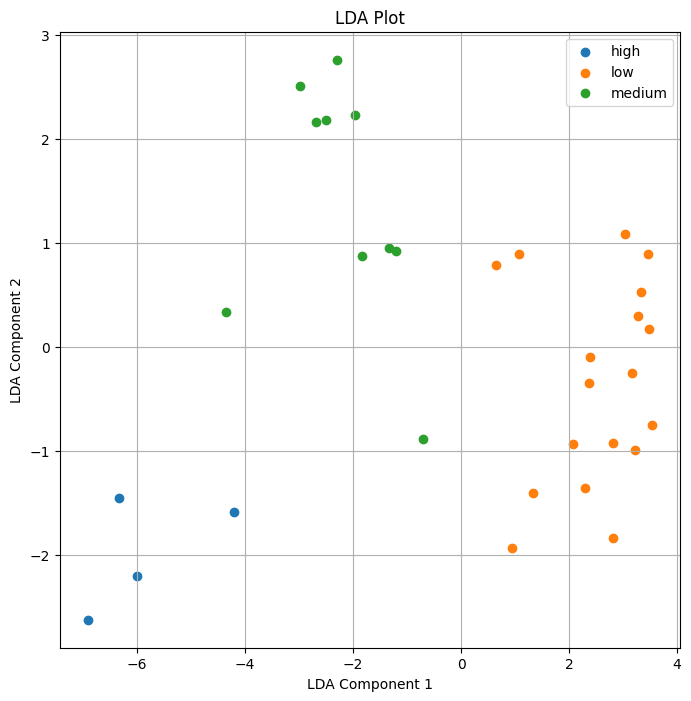

In [279]:

# Since y contains categorical labels like 'low', 'medium', and 'high', you need to encode them into integer labels 
# before using them as indices.

from sklearn.preprocessing import LabelEncoder

# Encode the target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)

num_unique_classes = len(np.unique(y_encoded))
max_components = min(X_scaled.shape[1], num_unique_classes - 1)
print("Number of unique classes:", num_unique_classes)
print("Maximum allowable value for n_components:", max_components)


# Initialize LDA
plt.figure(figsize=(8, 8))
for label in np.unique(y_encoded):
    label_value = label_encoder.inverse_transform([label])[0]  # Convert label back to its original value
    plt.scatter(X_lda[y_encoded == label, 0], X_lda[y_encoded == label, 1], label=label_value)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Plot')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# Unlike Principal Component Analysis (PCA), where the principal components have direct interpretations in terms of the 
# original features, the interpretation of LDA components in terms of the original features is not straightforward. LDA 
# components are derived from a combination of the original features based on the class separability criterion.

# Therefore, it's not meaningful to directly label the axes of an LDA plot with the original feature names because LDA 
# components do not correspond to specific original features. Instead, LDA is used primarily for dimensionality reduction 
# and classification rather than feature interpretation.


Best Hyperparameters: {'n_components': None, 'shrinkage': None, 'solver': 'svd'}


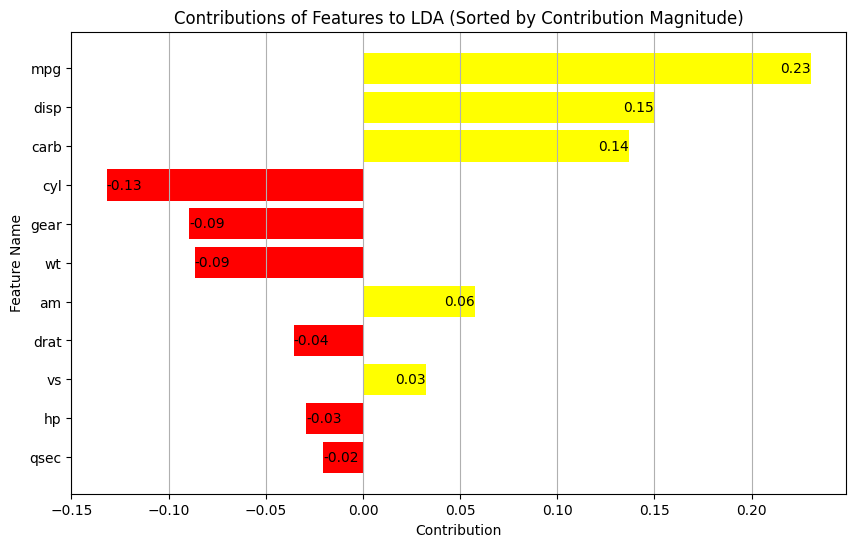

In [300]:

# preprocess steps done here, if not already done...in this case it's done, so we will skip this step...
# X = df.drop(columns=['mpg_category'])  # Features
# y = df['mpg_category']  # Target variable

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define the parameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solver options
    'shrinkage': [None, 'auto'],         # Shrinkage options
    'n_components': [None, 2, 5, 10]     # Number of components options
}

# Create an LDA classifier
lda = LDA()

# Initialize GridSearchCV
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_lda = grid_search.best_estimator_

# Get feature names after preprocessing
feature_names = X.columns

# Get contributions of features
feature_contributions = best_lda.coef_

# Normalize the contributions to sum up to 1
feature_contributions = feature_contributions / np.sum(np.abs(feature_contributions), axis=1)[:, np.newaxis]

# Get sorted indices based on absolute contributions
sorted_indices = np.argsort(np.abs(feature_contributions[0]))

# Sort feature names and contributions based on sorted indices
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_contributions = feature_contributions[0][sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, sorted_contributions, color=['red' if c < 0 else 'yellow' for c in sorted_contributions])
plt.xlabel('Contribution')
plt.ylabel('Feature Name')
plt.title('Contributions of Features to LDA (Sorted by Contribution Magnitude)')

# Annotate bars with contribution values
for bar, contribution in zip(bars, sorted_contributions):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{contribution:.2f}', ha='left' if contribution < 0 else 'right', va='center', color='black')

plt.grid(axis='x')
plt.show()
